## OMSA ISYE 6740 - Final Project

https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners 

In [1]:
######################################################################
# OMSA ISYE 6740 - Project - Code
# @author Binh Vu
######################################################################
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
train_path = './data/train.csv'
test_path  = './data/test.csv'

In [3]:
# Import training data
train = pd.read_csv(train_path)

#Filter out the sale condition to normal sale
train = train[train['SaleCondition'] == 'Normal']
train = train.drop(['Id'], axis=1)
num_train = train.shape[0]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
# Import test data
test = pd.read_csv(test_path)

#Filter out the sale condition to normal sale
test = test[test['SaleCondition'] == 'Normal']
test = test.drop(['Id'], axis=1)
num_test = test.shape[0]
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


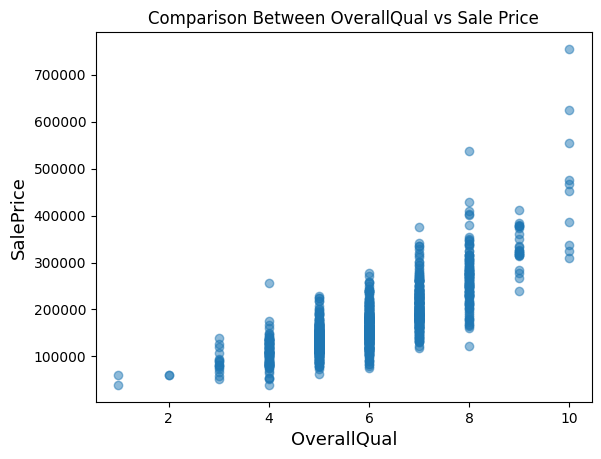

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'],alpha=0.5)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.title('Comparison Between OverallQual vs Sale Price')
plt.show()

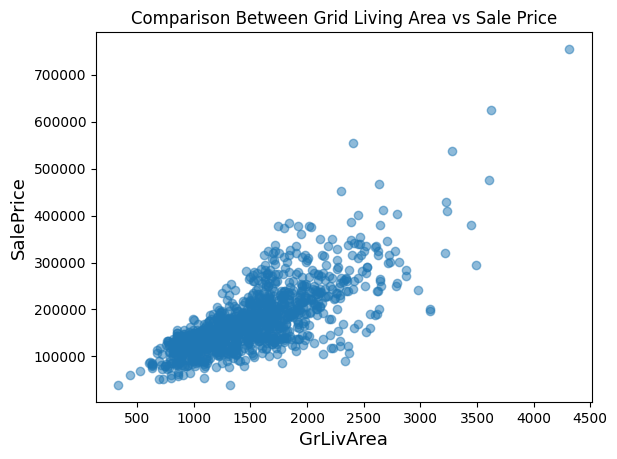

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'],alpha=0.5)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Comparison Between Grid Living Area vs Sale Price')
plt.show()

In [7]:
len(train.columns)

80

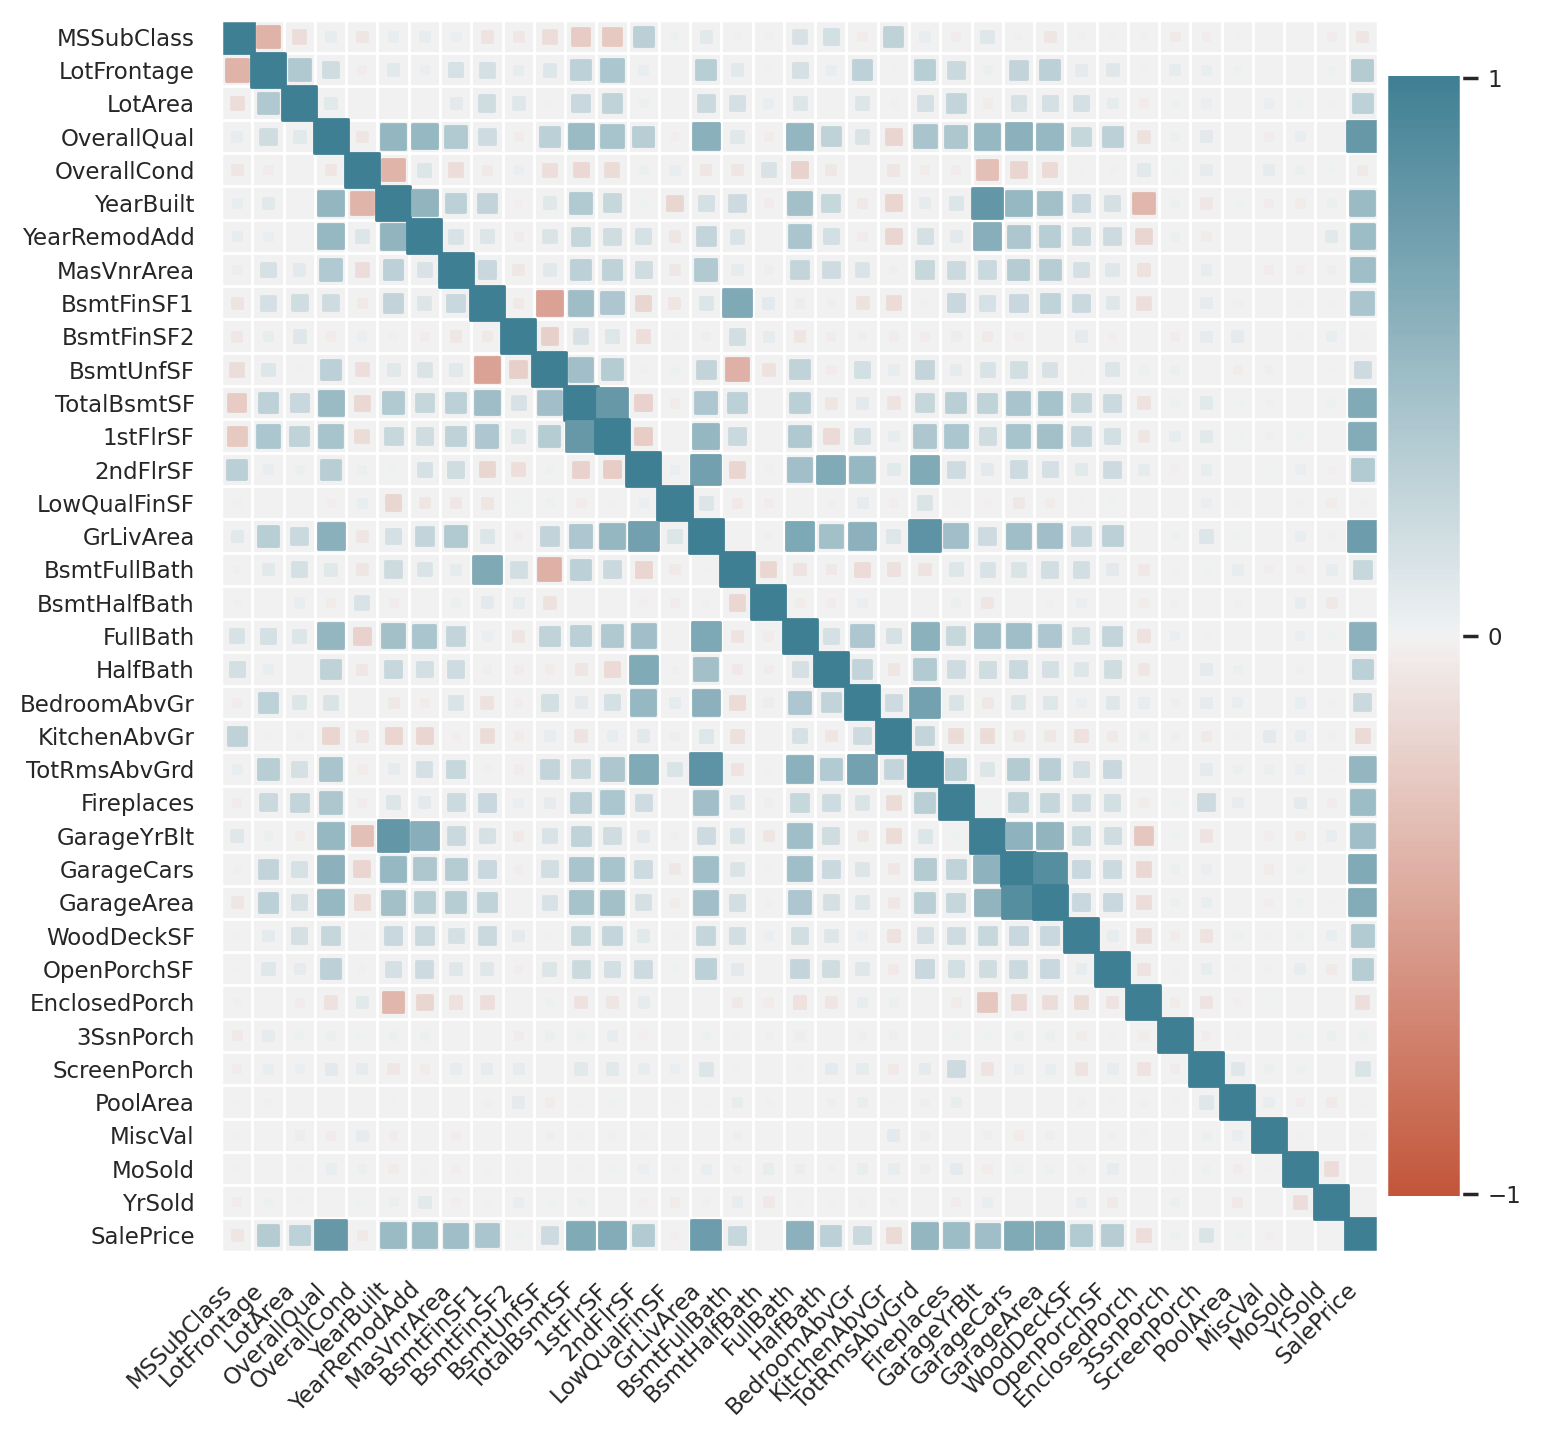

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=0.75)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

# Let's create a correlation matrix plot using all numerical columns from the dataset

plt.figure(figsize=(8, 8))
corrplot(train.corr(), size_scale=150);

In [9]:
train.corr()['SalePrice'].sort_values(ascending=False)[train.corr()['SalePrice'] > 0.5]

SalePrice       1.000000
OverallQual     0.786850
GrLivArea       0.744517
TotalBsmtSF     0.628819
GarageCars      0.626678
1stFlrSF        0.610918
GarageArea      0.608056
FullBath        0.562128
TotRmsAbvGrd    0.527860
Name: SalePrice, dtype: float64

In [10]:
# fit normal distribution
mean, std = stats.norm.fit(train['SalePrice'], loc=0)
pdf_norm = stats.norm.pdf(train['SalePrice'], mean, std)


 mu = 175202.22 and sigma = 69684.53



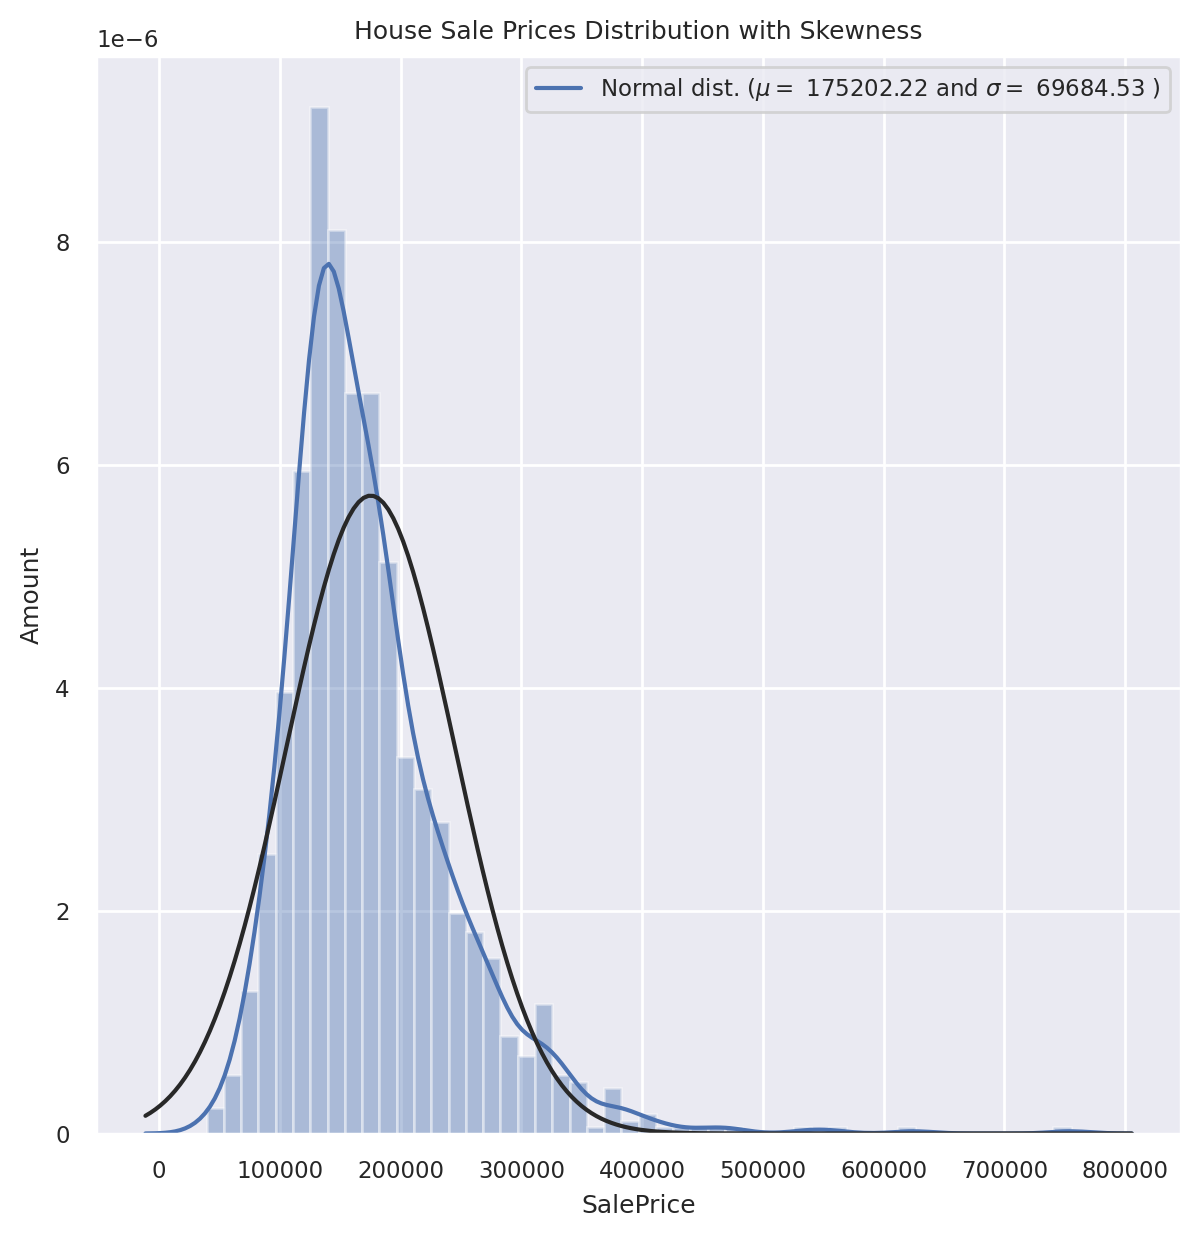

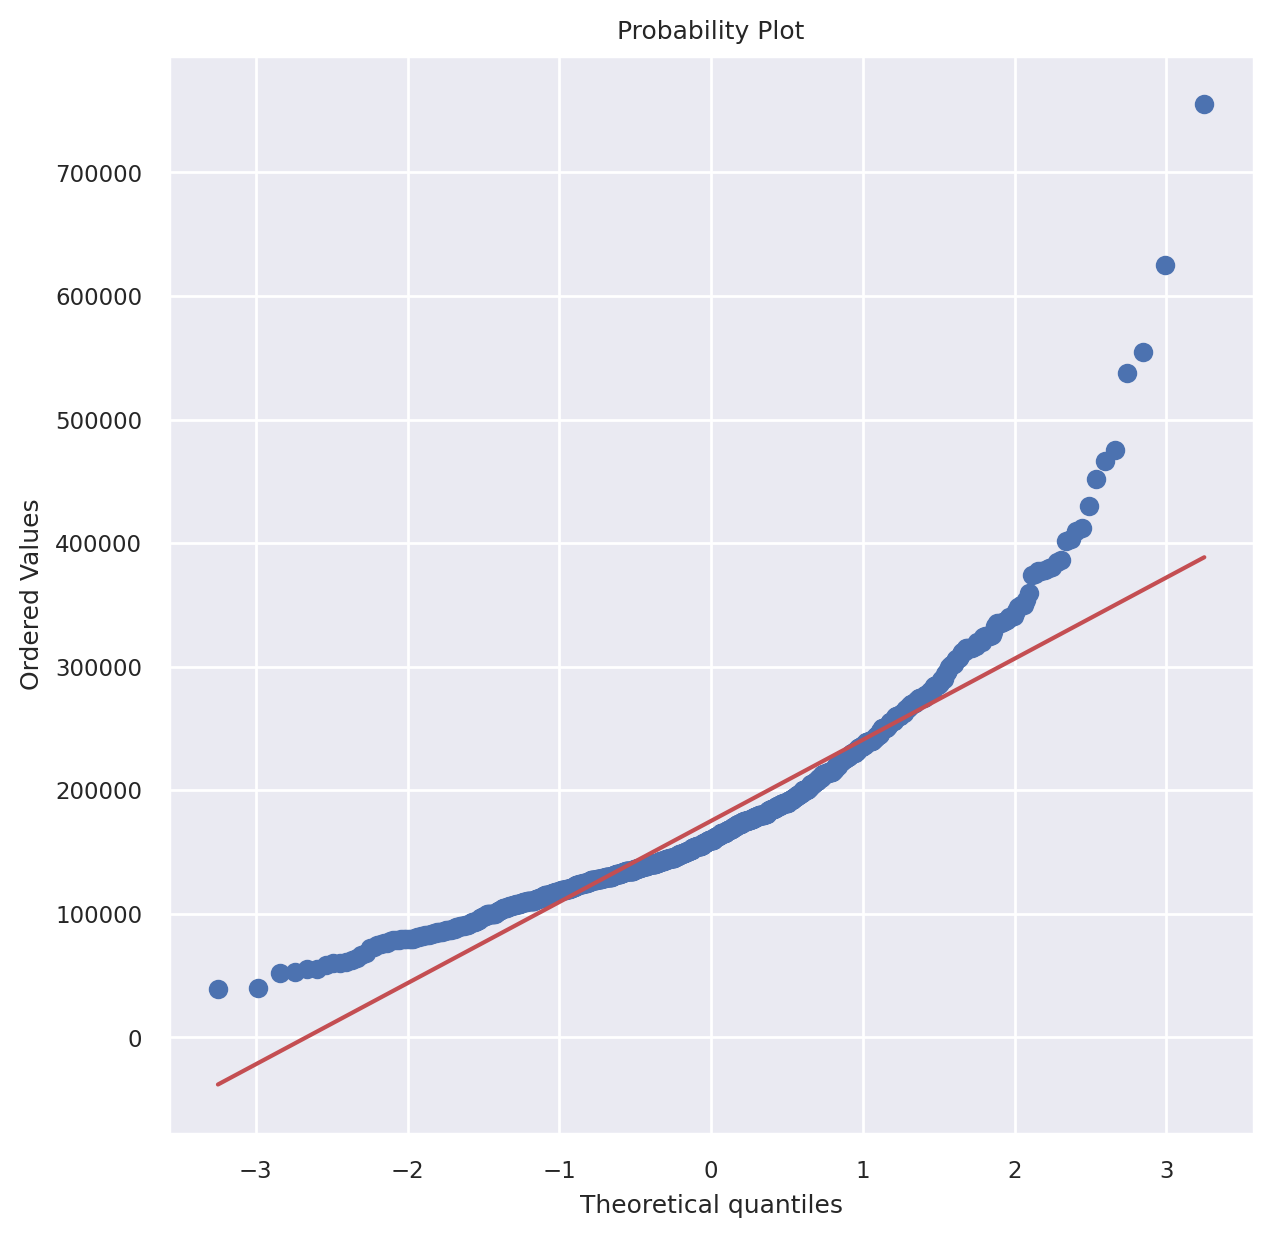

In [11]:
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Amount')
plt.title('House Sale Prices Distribution with Skewness')

#Get also the QQ-plot
fig = plt.figure()
plt.title('Q-Q Plot with Skewed Data')
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.01 and sigma = 0.37



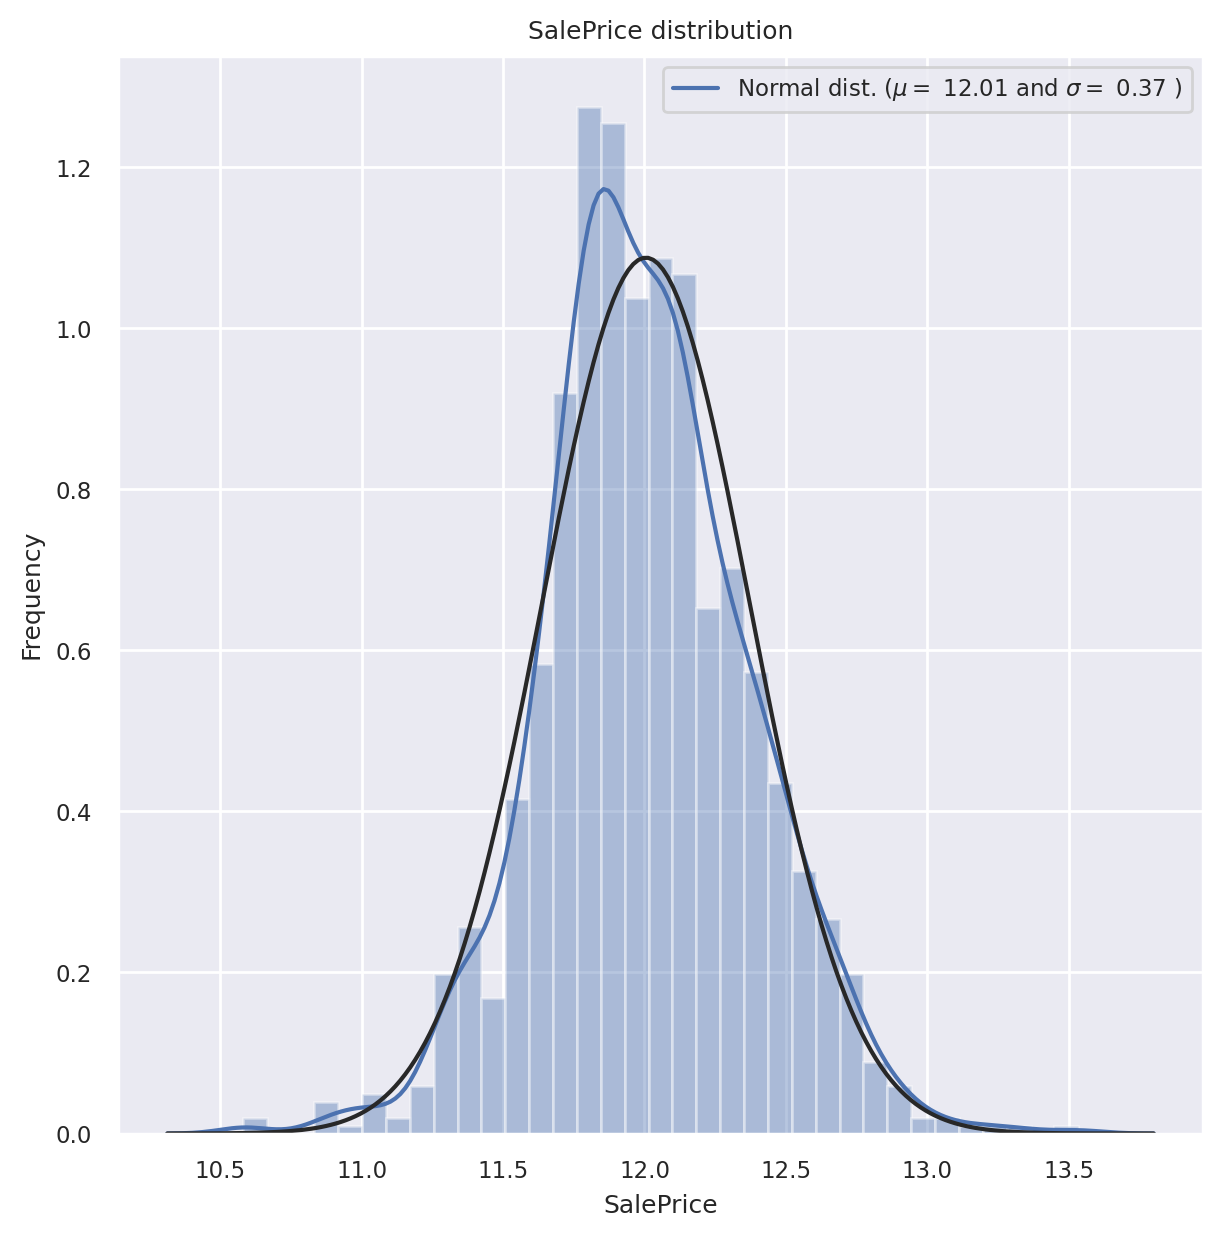

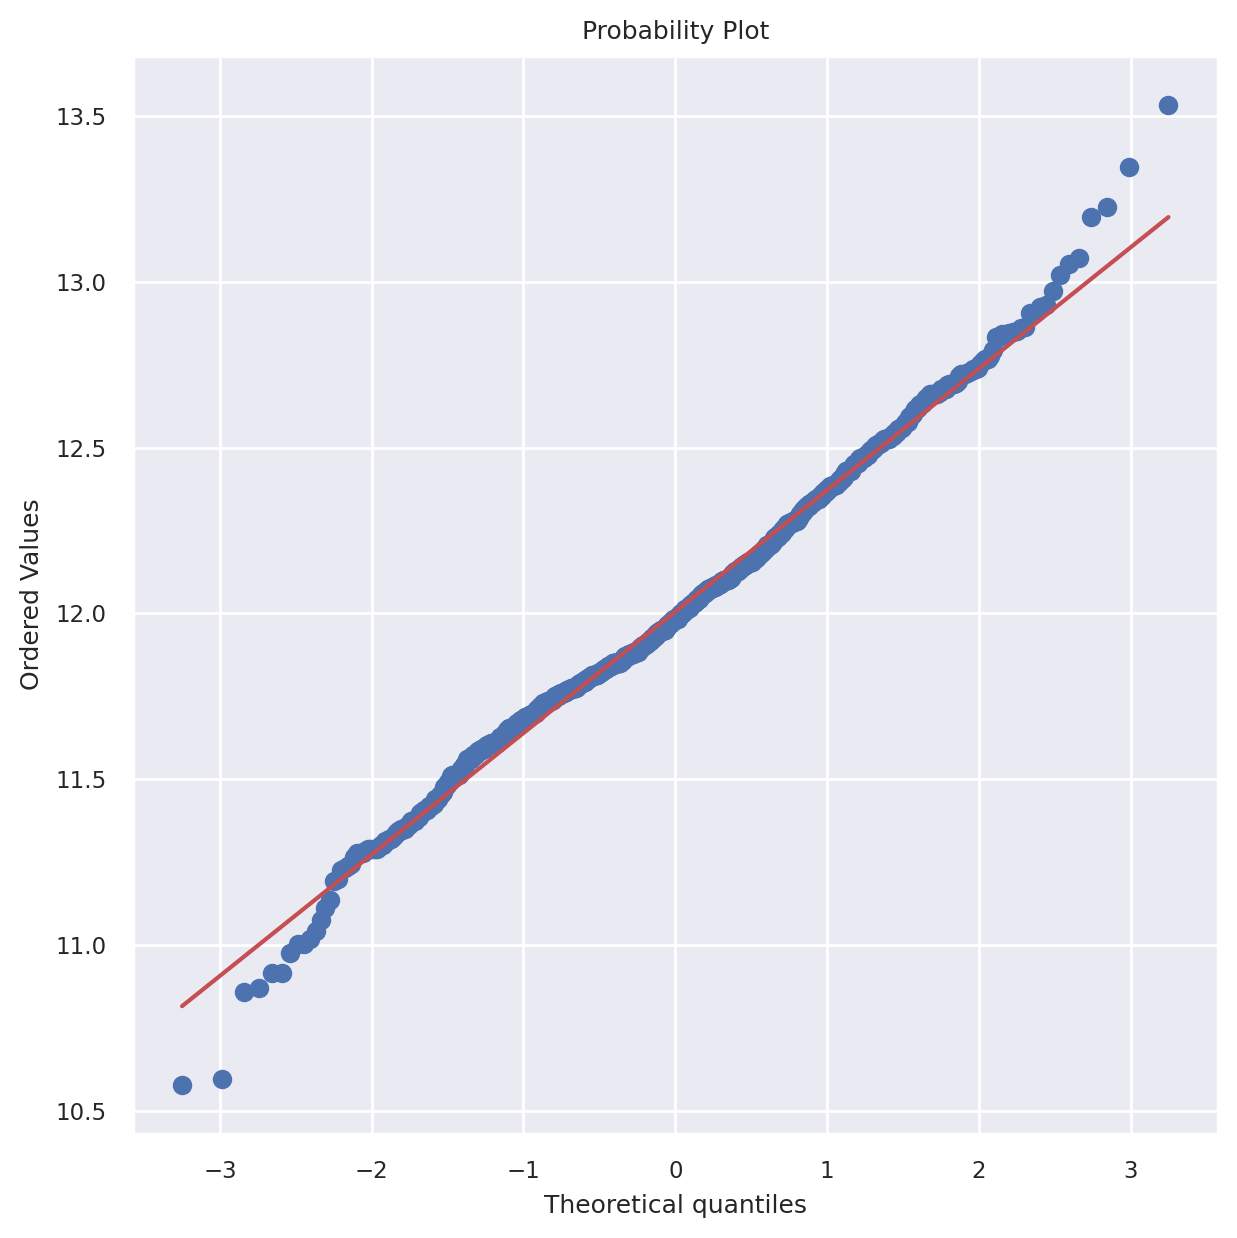

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [13]:
y_train = train['SalePrice']

### Help Link
https://www.kaggle.com/code/masumrumi/a-detailed-regression-guide-with-house-pricing

In [14]:
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data.shape

(2402, 79)

In [15]:
amount_missing = all_data.isnull().sum() 
percent_missing = amount_missing * 100 / len(all_data)
missing_value_df = pd.DataFrame({
                                 'amount_missing':amount_missing,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(30)

,amount_missing,percent_missing
PoolQC,2396,99.750208
MiscFeature,2306,96.003331
Alley,2248,93.588676
Fence,1901,79.142381
FireplaceQu,1162,48.376353
LotFrontage,447,18.609492
GarageFinish,117,4.870941
GarageQual,117,4.870941
GarageCond,117,4.870941
GarageYrBlt,117,4.870941


In [16]:
amount_missing = train.isnull().sum() 
percent_missing = amount_missing * 100 / len(train)
missing_value_df = pd.DataFrame({
                                 'amount_missing':amount_missing,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(30)

,amount_missing,percent_missing
PoolQC,1195,99.749583
MiscFeature,1148,95.826377
Alley,1127,94.073456
Fence,957,79.883139
FireplaceQu,563,46.994992
LotFrontage,237,19.782972
GarageYrBlt,61,5.091820
GarageCond,61,5.091820
GarageType,61,5.091820
GarageFinish,61,5.091820


In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [18]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [19]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [20]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [21]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [22]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [23]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [24]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [26]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [27]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [28]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [29]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [30]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

In [31]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [32]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [33]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [34]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [35]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [36]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [37]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [38]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2402, 79)


In [40]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,20.627608
PoolArea,19.181570
LotArea,13.391213
LowQualFinSF,13.210434
3SsnPorch,11.916462
LandSlope,4.884503
KitchenAbvGr,4.666565
EnclosedPorch,4.083820
ScreenPorch,3.988431
BsmtFinSF2,3.928768


In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 58 skewed numerical features to Box Cox transform


In [42]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,AllPub,Inside,...,0.0,0.0,1.540963,1.820334,None,0.000000,1.820334,1.194318,WD,Normal
1,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,AllPub,FR2,...,0.0,0.0,1.540963,1.820334,None,0.000000,2.440268,0.730463,WD,Normal
2,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,AllPub,Inside,...,0.0,0.0,1.540963,1.820334,None,0.000000,3.011340,1.194318,WD,Normal
3,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,AllPub,FR2,...,0.0,0.0,1.540963,1.820334,None,0.000000,1.540963,1.194318,WD,Normal
4,2.750250,RL,6.337529,21.282283,0.730463,0.730463,0.000000,Lvl,AllPub,Inside,...,0.0,0.0,1.540963,1.194318,Shed,11.147538,0.730463,1.540963,WD,Normal


In [43]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2402, 211)


In [44]:
train = all_data.iloc[0:num_train, :-1]
y = train.iloc[:, -1:]

print(f'train {train.shape}')

train (1198, 210)


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error,mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y_train,test_size = 0.3,random_state= 0)

In [47]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

print()

print('Mean Absolute Error train = ' + str(mean_absolute_error(y_train, y_pred_train)))
print('Mean Absolute Error test = ' + str(mean_absolute_error(y_test, y_pred_test)))
print()
print('R-Squared train = ' + str(r2_score(y_train, y_pred_train)))
print('R-Squared test = ' + str(r2_score(y_test, y_pred_test)))

Root Mean Square Error train = 0.0746023604189707
Root Mean Square Error test = 0.10286870922044965

Mean Absolute Error train = 0.0548331102728167
Mean Absolute Error test = 0.0749732939555121

R-Squared train = 0.9567070760702385
R-Squared test = 0.9284560062133734


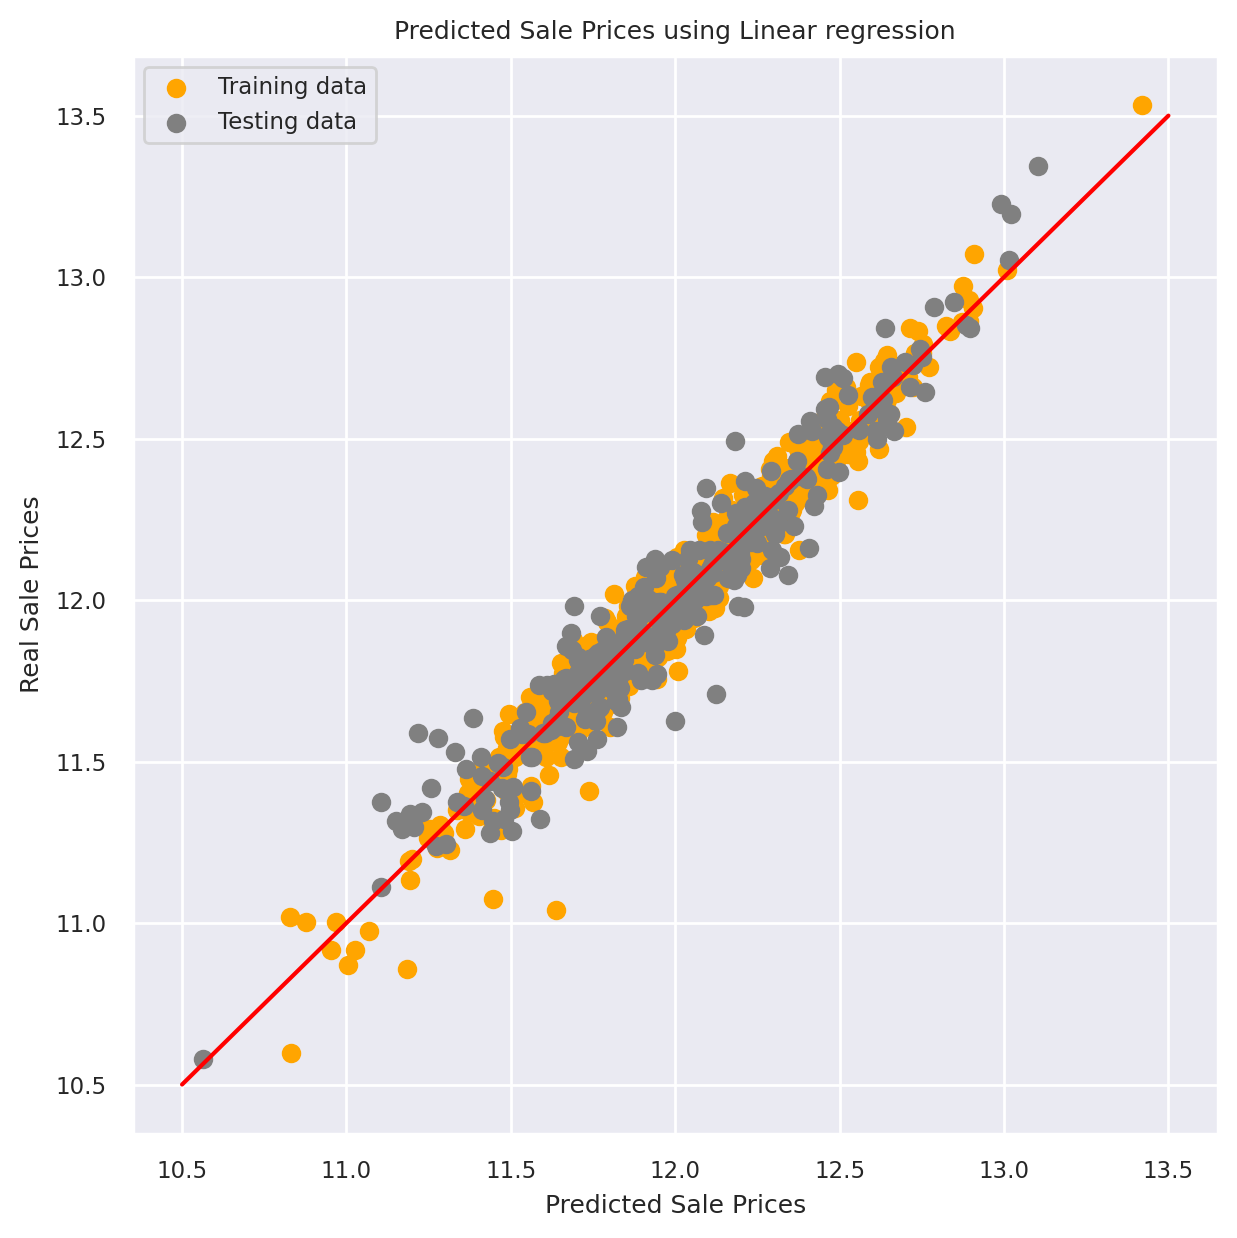

In [49]:
# Plot predictions - Real values
plt.scatter(y_pred_train, y_train, c = 'orange',  label = "Training data")
plt.scatter(y_pred_test, y_test, c = 'gray',  label = "Testing data")
plt.title("Predicted Sale Prices using Linear regression")
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Real Sale Prices")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

The best value of Alpha is:  {'alpha': 0.0005} 0.9192089579354287


In [51]:
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(X_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Mean Absolute Error train = ' + str(mean_absolute_error(y_train, y_pred_train)))
print()
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('Mean Absolute Error test = ' + str(mean_absolute_error(y_test, y_pred_test)))
print()
print('R-Squared train = ' + str(r2_score(y_train, y_pred_train)))
print('R-Squared test = ' + str(r2_score(y_test, y_pred_test)))

Root Mean Square Error train = 0.0854370852920012
Mean Absolute Error train = 0.0636120707487714

Root Mean Square Error test = 0.09926604706815845
Mean Absolute Error test = 0.07467981867787708

R-Squared train = 0.9432187919005834
R-Squared test = 0.9333794743484016


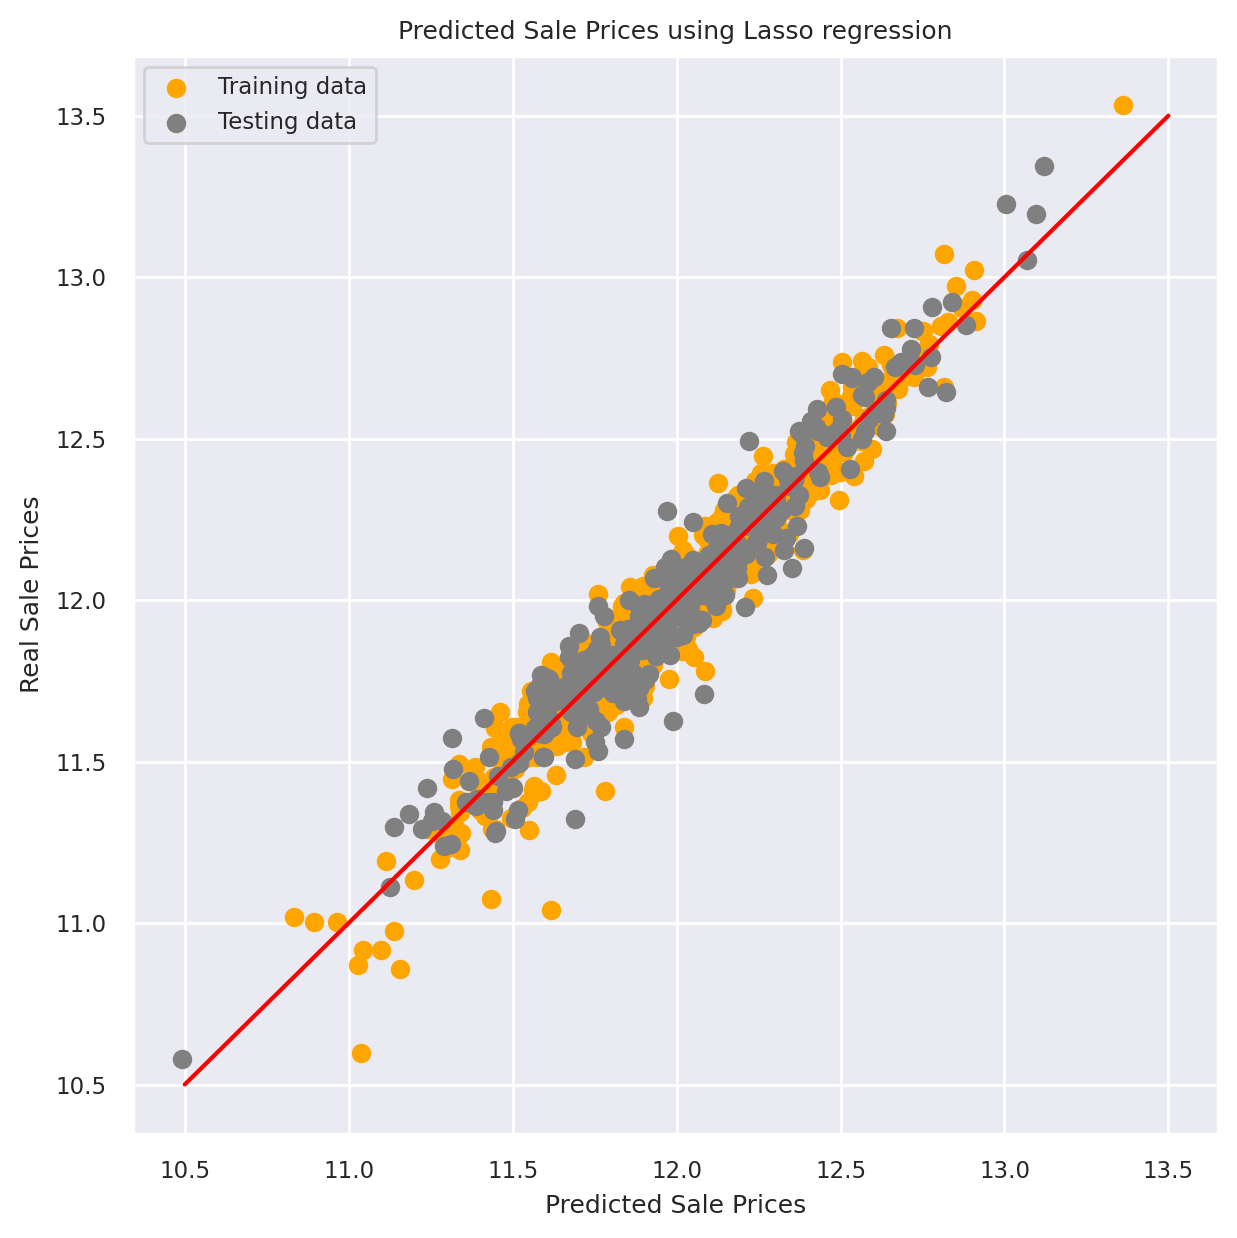

In [52]:
# Plot predictions - Real values
plt.scatter(y_pred_train, y_train, c = 'orange',  label = "Training data")
plt.scatter(y_pred_test, y_test, c = 'gray',  label = "Testing data")
plt.title("Predicted Sale Prices using Lasso regression")
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Real Sale Prices")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

https://www.kaggle.com/code/janvichokshi/random-forest-xgb-ridge-lasso-all-in-one

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Mean Absolute Error train = ' + str(mean_absolute_error(y_train, y_pred_train)))
print()
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('Mean Absolute Error test = ' + str(mean_absolute_error(y_test, y_pred_test)))
print()
print('R-Squared train = ' + str(r2_score(y_train, y_pred_train)))
print('R-Squared test = ' + str(r2_score(y_test, y_pred_test)))

RandomForestRegressor(max_depth=25, n_estimators=33)
Root Mean Square Error train = 0.04964227261279777
Mean Absolute Error train = 0.034078465515959944

Root Mean Square Error test = 0.13505119020032225
Mean Absolute Error test = 0.09475184262627488

R-Squared train = 0.9808303099403515
R-Squared test = 0.8766885424660475


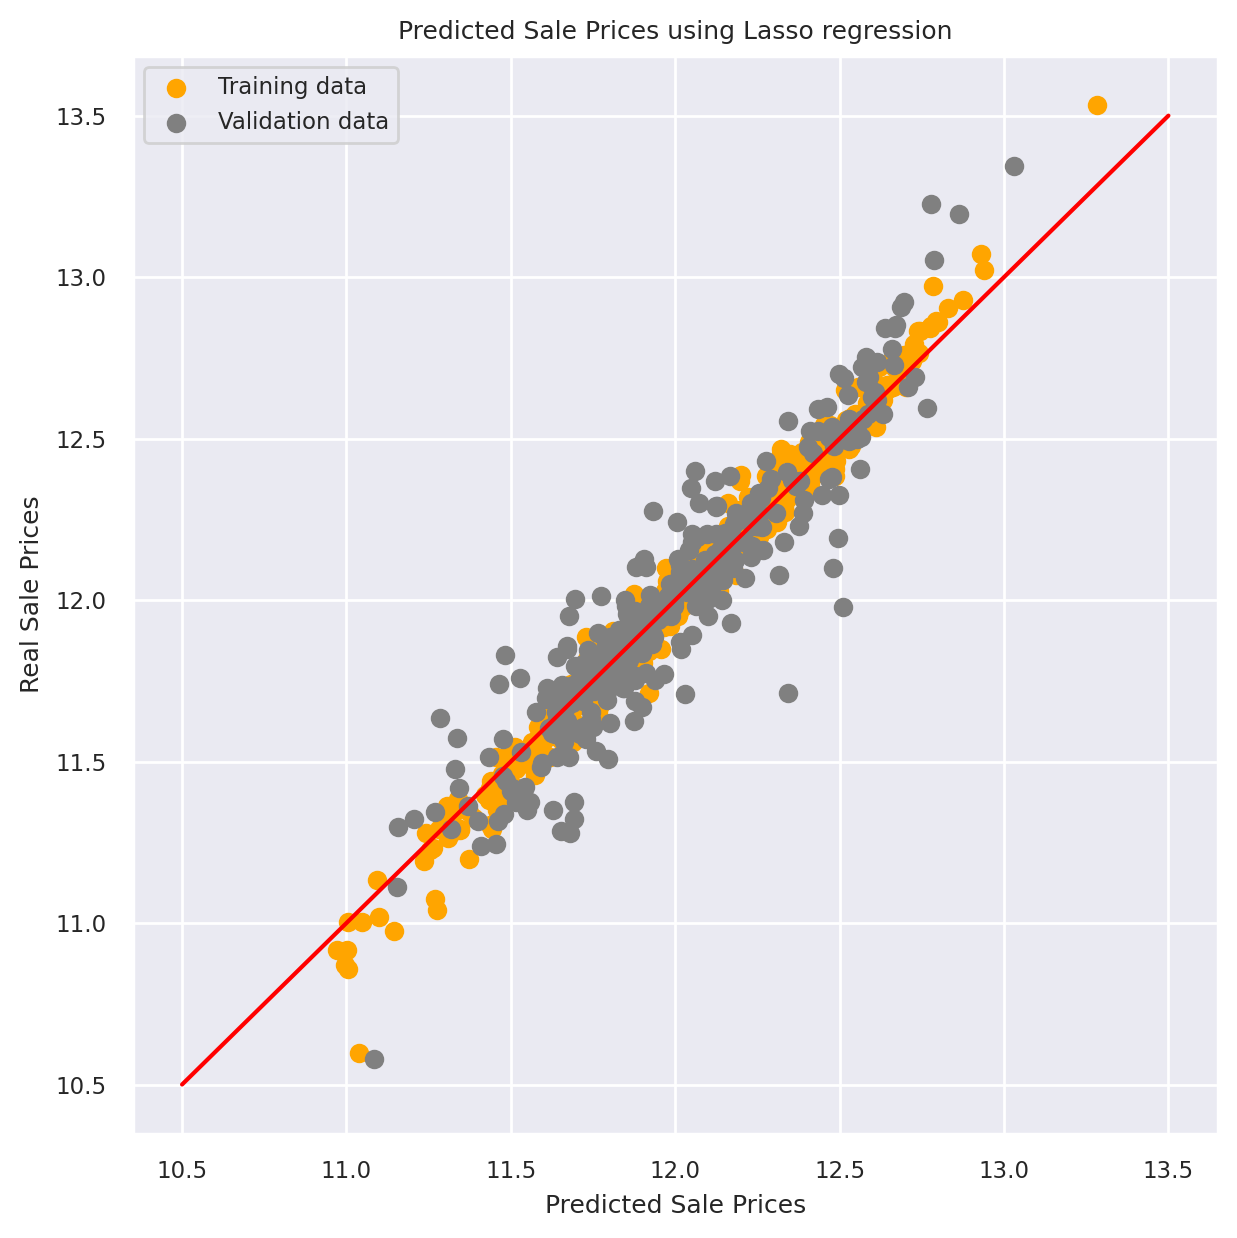

In [54]:
# Plot predictions - Real values
plt.scatter(y_pred_train, y_train, c = 'orange',  label = "Training data")
plt.scatter(y_pred_test, y_test, c = 'gray',  label = "Validation data")
plt.title("Predicted Sale Prices using Lasso regression")
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Real Sale Prices")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()